**Unicorn companies exploratory data analysis project**

*"a unicorn is a startup company valued at over US$1 billion which is privately owned and not listed on a share market."*

In this dataset, I seek to identify:
 1. Median years for a company to become a unicorn by industries
 2. Which industries receive the most investment 
 3. Identify the trend of unicorn companies 
 4. Total valuation by countries
 5. Which industries have the highest number of high valuation unicorns
 6. Top 10 investors


In [1]:
#import libraries and load data 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

companies = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Data analytics\Achived datasets\Economics\Unicorn_Companies.csv")
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


**Preliminary dataset inspection and transformation**

In [2]:
#Check total columns and rows 
companies.shape

(1074, 10)

In [3]:
#Check general info and datatypes 
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [4]:
#Change date to date type data 
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12100\764831294.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])


In [5]:
#Chech date range 
print(companies['Date Joined'].min())
print(companies['Date Joined'].max())

2007-07-02 00:00:00
2022-04-05 00:00:00


In [6]:
#Change valuation and funding columns into integer type 
'''
I create this function to remove any special chracters and returns interger
If there is 'Unknown' then returns 'Unknown'
'''
def str_to_num(x):
    if x == 'Unknown':
        return 'Unknown'
    x = x.strip('$')
    if x.endswith('B'):
        return int(float(x[:-1]) )
    elif x.endswith('M'):
        return float(float(x[:-1]) /1000)
    elif x.replace('.', '', 1).isdigit():
        return int(float(x))
    else:
        return 'Unknown'

In [7]:
#Apply the function to valuation column
companies['Valuation_num'] = companies['Valuation'].apply(str_to_num)


In [8]:
#Apply the function to the Funding column
companies['Funding_num'] = companies['Funding'].apply(str_to_num)


In [9]:
#Verify the results
companies[companies['Funding_num'] == 'Unknown'].head(3)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Valuation_num,Funding_num
215,SSENSE,$4B,2021-06-08,E-commerce & direct-to-consumer,Montreal,Canada,North America,2003,Unknown,Sequoia Capital,4,Unknown
424,Uplight,$2B,2021-03-03,Other,Boulder,United States,North America,2019,Unknown,"Rubicon Technology Partners, Max Ventures, Inc...",2,Unknown
567,ISN,$2B,2020-12-17,"Supply chain, logistics, & delivery",Dallas,United States,North America,2001,Unknown,Blackstone,2,Unknown


In [10]:
#Next I add a Years to unicorn column
companies['Years To Unicorn'] = companies['Date Joined'].dt.year - companies['Year Founded']


**Data validation**

In [11]:
#Get descriptive statistics for Years to unicorn column 
companies['Years To Unicorn'].describe()

count    1074.000000
mean        7.000931
std         5.329672
min        -4.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Years To Unicorn, dtype: float64

In [12]:
#Next I identify any rows containing a negative years to unicorn 
companies[companies['Years To Unicorn'] < 0]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Valuation_num,Funding_num,Years To Unicorn
714,Yidian Zixun,$1B,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund",1,0.151,-4


In [13]:
# Yidian Zixun is founded in 2013 so I replace 2021 to 2013
companies.loc[companies['Company'] == 'Yidian Zixun', 'Year Founded'] = 2013
companies[companies['Company'] == 'Yidian Zixun']

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Valuation_num,Funding_num,Years To Unicorn
714,Yidian Zixun,$1B,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2013,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund",1,0.151,-4


In [14]:
# Recalculate the years to unicorn column 
companies['Years To Unicorn'] = companies['Date Joined'].dt.year - companies['Year Founded']
companies['Years To Unicorn'].describe()

count    1074.000000
mean        7.008380
std         5.319864
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Years To Unicorn, dtype: float64

In [15]:
#The dataset provides the expected industry labels so I want to check if there are mispelling errors 

industry_list = ['Artificial intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech',\
       'Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail',\
       'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', \
        'Travel', 'Cybersecurity','Mobile & telecommunications']

#I check which values in the Industry column but not in the industry_list 
set(companies['Industry']) - set(industry_list)

{'Artificial Intelligence'}

In [16]:
# I discovered that the letter 'I' in 'Intelligence' should be lower case 
companies['Industry'] = companies['Industry'].replace('Artificial Intelligence', 'Artificial intelligence')
set(companies['Industry']) - set(industry_list)

set()

In [17]:
#Drop all duplicated company names. There is 1 duplicate
companies.drop_duplicates(subset= 'Company', inplace= True)
companies.shape


(1073, 13)

**General descriptive statistics**

In [18]:
#Descriptive statistics 
companies.select_dtypes(include= ['number']).describe()

,Year Founded,Valuation_num,Years To Unicorn
count,1073.000000,1073.000000,1073.000000
mean,2012.887232,3.448276,7.008388
std,5.695750,8.547899,5.322345
min,1919.000000,1.000000,0.000000
25%,2011.000000,1.000000,4.000000
50%,2014.000000,2.000000,6.000000
75%,2016.000000,3.000000,9.000000
max,2021.000000,180.000000,98.000000


Text(10, 100, 'The histogram shows a \nnormal distribution with a few outliers ')

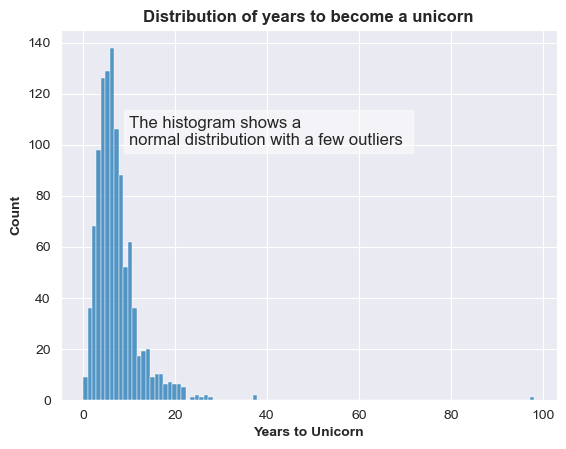

In [19]:
#See distribution for years to unicorn 
sns.set_style('darkgrid')
sns.histplot(data = companies, x= 'Years To Unicorn')
plt.xlabel('Years to Unicorn', weight= 'bold')
plt.ylabel('Count', weight= 'bold')
plt.title('Distribution of years to become a unicorn', weight= 'bold')

plt.text(10, 100, 'The histogram shows a \nnormal distribution with a few outliers ', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


In [20]:
#It takes Otto Bock HealthCare 98 years to become a unicorn 
companies[companies['Years To Unicorn'] > 30]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Valuation_num,Funding_num,Years To Unicorn
189,Otto Bock HealthCare,$4B,2017-06-24,Health,Duderstadt,Germany,Europe,1919,$0M,EQT Partners,4,0.0,98
373,Promasidor Holdings,$2B,2016-11-08,Consumer & retail,Bryanston,South Africa,Asia,1979,$556M,"IFC, Ajinomoto",2,0.556,37
699,Five Star Business Finance,$1B,2021-03-26,Other,Chennai,India,Asia,1984,$456M,"Sequoia Capital India, Tiger Global Management...",1,0.456,37


Text(0.5, 1.0, 'Distribution of companies founded year')

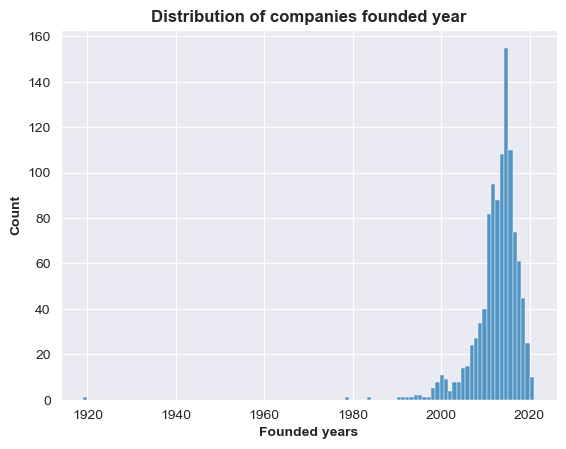

In [21]:
#See distribution of companies' founded year
sns.set_style('darkgrid')
sns.histplot(data = companies, x= 'Year Founded')
plt.xlabel('Founded years', weight= 'bold')
plt.ylabel('Count', weight= 'bold')
plt.title('Distribution of companies founded year', weight= 'bold')



**Start the EDA process**

**1. Median years for a company to become a unicorn by industries**

In [22]:
'''
I group the data by industries and aggregate their median years to unicorn as well as the average years 
'''
companies_medyrs = companies.groupby('Industry')['Years To Unicorn'].median().sort_values(ascending= True).reset_index()
companies_avgyrs = companies.groupby('Industry')['Years To Unicorn'].mean().sort_values(ascending= True).reset_index()

Text(10, 5, 'The data reveals that companies in the  Auto transportation and AI \n industries take it faster to become a unicorn, whereas sectors like \n Healthcare takes longer to fully transform to a unicorn. Leading\n in AI industry are OpenAI and Bytedance.')

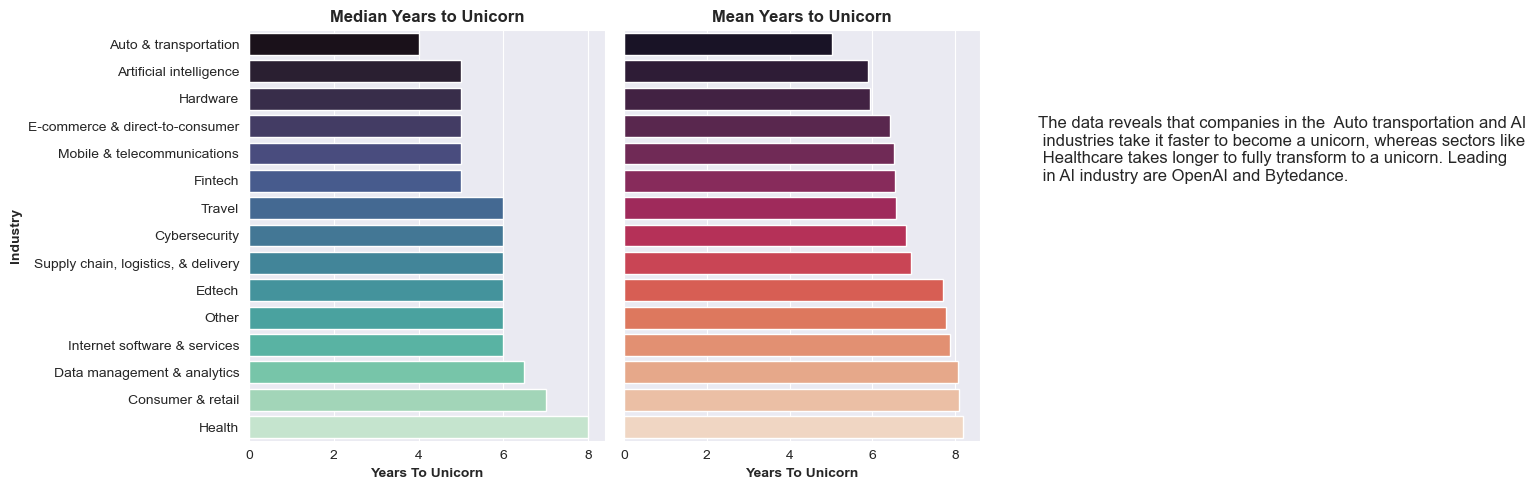

In [23]:
#Side by side horizontal bar graphs to compare mean and median years of each industry 
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.barplot(data=companies_medyrs, x='Years To Unicorn', y='Industry', ax=axes[0], palette='mako')
axes[0].set_title('Median Years to Unicorn', weight='bold')
axes[0].set_xlabel('Years To Unicorn', weight='bold')
axes[0].set_ylabel('Industry', weight='bold')

# Plot the mean years to unicorn
sns.barplot(data=companies_avgyrs, x='Years To Unicorn', y='Industry', ax=axes[1], palette='rocket')
axes[1].set_title('Mean Years to Unicorn', weight='bold')
axes[1].set_xlabel('Years To Unicorn', weight='bold')
axes[1].set_ylabel('')

# Adjust the layout
plt.tight_layout()

#Add text observation 
plt.text(10, 5, 'The data reveals that companies in the  Auto transportation and AI \n industries take it faster to become a unicorn, whereas sectors like \n Healthcare takes longer to fully transform to a unicorn. Leading\n in AI industry are OpenAI and Bytedance.' , fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

 **2. Which industries receive the most investment**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Fintech'),
  Text(1, 0, 'E-commerce & direct-to-consumer'),
  Text(2, 0, 'Internet software & services'),
  Text(3, 0, 'Artificial intelligence'),
  Text(4, 0, 'Supply chain, logistics, & delivery'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Auto & transportation'),
  Text(7, 0, 'Health'),
  Text(8, 0, 'Consumer & retail'),
  Text(9, 0, 'Cybersecurity'),
  Text(10, 0, 'Edtech'),
  Text(11, 0, 'Hardware'),
  Text(12, 0, 'Data management & analytics'),
  Text(13, 0, 'Mobile & telecommunications'),
  Text(14, 0, 'Travel')])

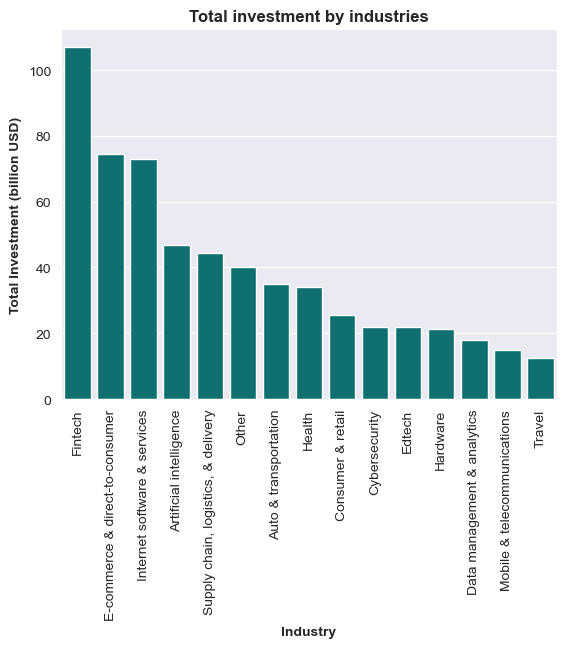

In [24]:
'''
I filtered out the 'Unknown' values in the Funding_num column and then group the data on industries
'''
industry_investment = companies[companies['Funding_num'] != 'Unknown']

bar_investmnet = industry_investment.groupby('Industry')['Funding_num'].sum().sort_values(ascending= False).reset_index(name= 'Total Funding')

#Create a bar graph for comparison 
sns.barplot (data= bar_investmnet, x= 'Industry', y= 'Total Funding', color= 'teal')
plt.xlabel('Industry', weight = 'bold')
plt.ylabel('Total Investment (billion USD)', weight = 'bold')
plt.title ("Total investment by industries", weight= 'bold')
plt.xticks (rotation = 90)


**3. Identify the trend of unicorn companies**

In [25]:
#First a create a year only column from Date Joined column
companies['Year Joined'] = companies['Date Joined'].dt.strftime('%Y')
companies.head(2)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Valuation_num,Funding_num,Years To Unicorn,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",180,8,5,2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",100,7,10,2012


Text(4, 100, 'The bar graph shows a surge in companies achieving unicorn status across\n various industries in 2021. Notably, Fintech, Internet Software & Services,\n and E-commerce & Direct-to-Consumer industries led this trend. During the peak of \n COVID-19 in 2021, there was a significant rise in health industry unicorns. However,\n the number of unicorn companies declined in 2022, with Fintech remaining the leading field.   ')

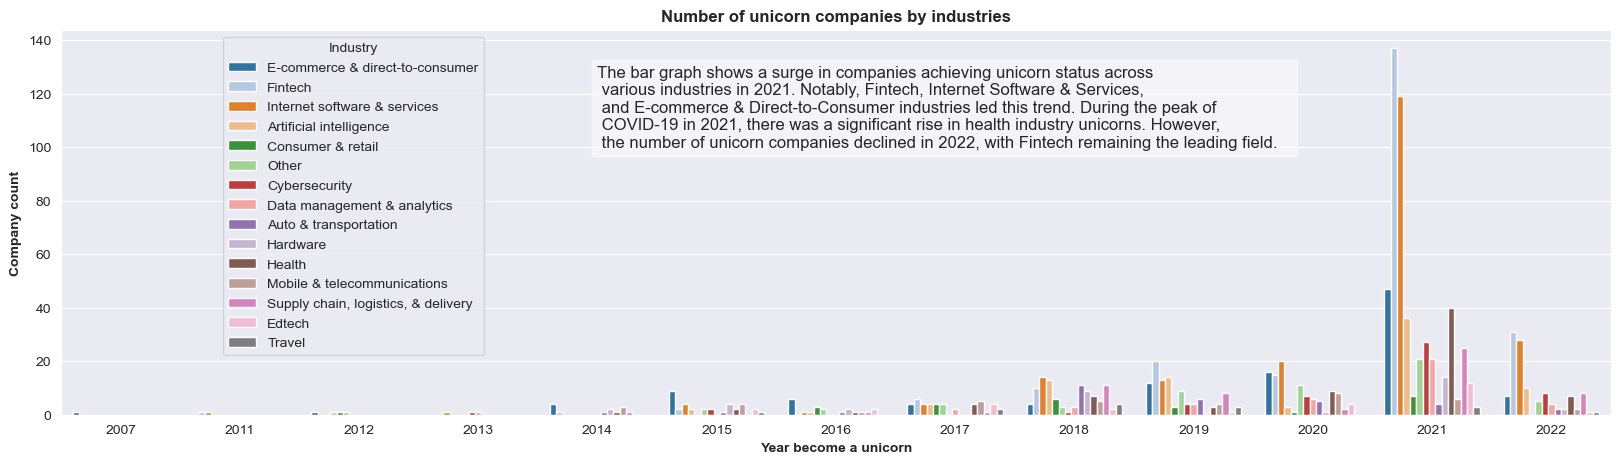

In [26]:
#Aggregate data 
bar_trend = companies.groupby(['Year Joined', 'Industry'])['Company'].count().reset_index()

#Create bar graph to see trend

plt.figure(figsize= (20, 5))
top_comp = sns.barplot(data= bar_trend, x= 'Year Joined', y= 'Company', hue = 'Industry', palette='tab20')

plt.xlabel('Year become a unicorn', weight = 'bold')
plt.ylabel('Company count', weight = 'bold')
plt.title ("Number of unicorn companies by industries", weight= 'bold')

#Move legend to the left
sns.move_legend(top_comp, "upper left", bbox_to_anchor=(0.1, 1))

#Add observation text 
plt.text(4, 100, 'The bar graph shows a surge in companies achieving unicorn status across\n various industries in 2021. Notably, Fintech, Internet Software & Services,\n and E-commerce & Direct-to-Consumer industries led this trend. During the peak of \n COVID-19 in 2021, there was a significant rise in health industry unicorns. However,\n the number of unicorn companies declined in 2022, with Fintech remaining the leading field.   ' , fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


In [27]:
bar_trend.head(3)

,Year Joined,Industry,Company
0,2007,E-commerce & direct-to-consumer,1
1,2011,Fintech,1
2,2011,Internet software & services,1


In [28]:
#Create a heatmap to show the emergence of unicorn accross different industries 
heatmap_unicorn = bar_trend.pivot(index= 'Industry', columns= 'Year Joined', values= 'Company' )
heatmap_unicorn

Year Joined,2007,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Industry,,,,,,,,,,,,,
Artificial intelligence,NaN,NaN,1.0,NaN,NaN,2.0,1.0,4.0,13.0,14.0,3.0,36.0,10.0
Auto & transportation,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,11.0,6.0,5.0,4.0,2.0
Consumer & retail,NaN,NaN,1.0,NaN,NaN,NaN,3.0,4.0,6.0,3.0,1.0,7.0,NaN
Cybersecurity,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,1.0,4.0,7.0,27.0,8.0
Data management & analytics,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,3.0,4.0,6.0,21.0,4.0
E-commerce & direct-to-consumer,1.0,NaN,1.0,NaN,4.0,9.0,6.0,4.0,4.0,12.0,16.0,47.0,7.0
Edtech,NaN,NaN,NaN,NaN,NaN,2.0,2.0,4.0,2.0,1.0,4.0,12.0,1.0
Fintech,NaN,1.0,NaN,NaN,1.0,2.0,NaN,6.0,10.0,20.0,15.0,137.0,31.0
Hardware,NaN,NaN,NaN,NaN,2.0,4.0,2.0,NaN,9.0,NaN,1.0,14.0,2.0


Text(0.5, 1.0, 'Number of unicorns through the years by industries')

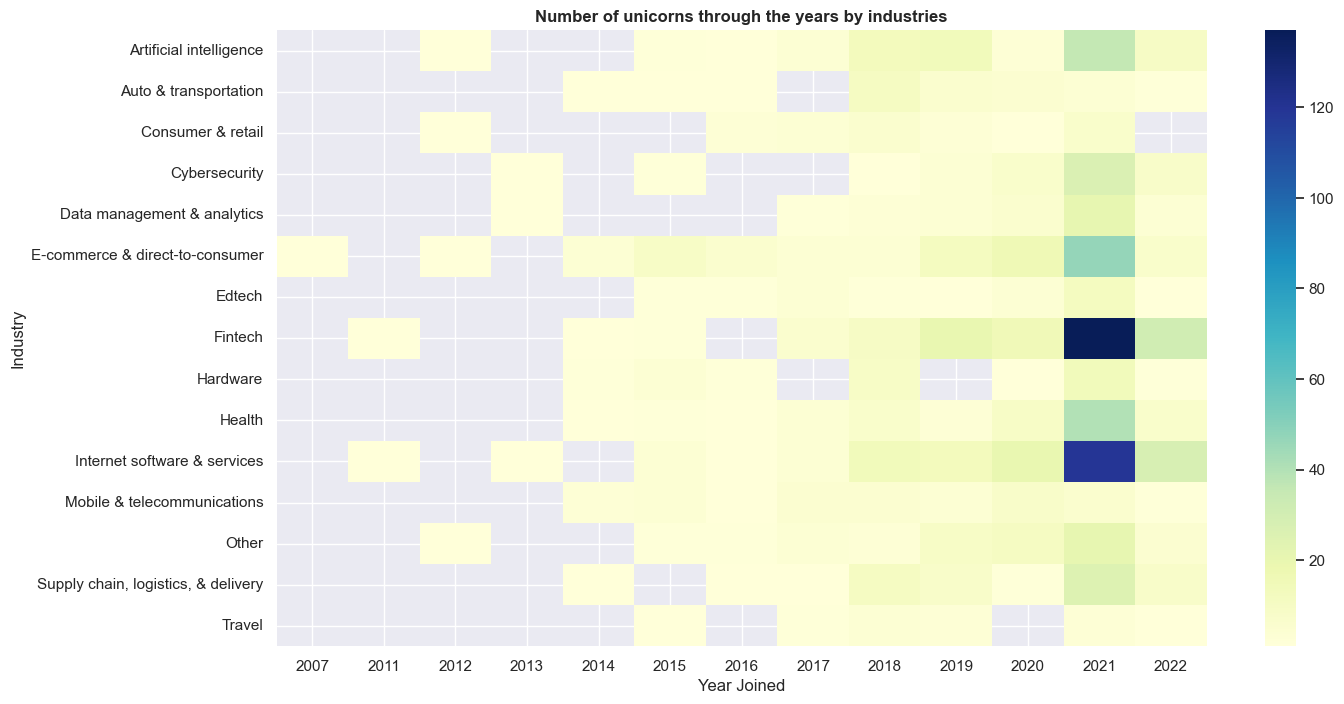

In [29]:
#create a heatmap
sns.set(rc = {'figure.figsize': (15,8)})
sns.heatmap(heatmap_unicorn, cmap= 'YlGnBu')
plt.title ('Number of unicorns through the years by industries', weight = 'bold')

**4. Total valuation by country**

In [30]:

import plotly.express as px

In [31]:
# Identify which countries has the highest total unicorn evaluation 
countries_grouped = companies.groupby('Country/Region')['Valuation_num'].sum().reset_index(name= 'Total_valuation')

fig_map = px.scatter_geo(countries_grouped,
              locations= 'Country/Region',   
              size= 'Total_valuation', 
              locationmode = 'country names',
              color= 'Total_valuation',
              color_continuous_scale='Viridis'
              

)
#expand the plot area
fig_map.update_layout(
    title='Total Unicorn Valuation by Country',
    margin={"r":0,"t":0,"l":0,"b":0},  # Adjust the margins to expand the plot area
)


 **5. Which industries has the highest number of high valuation unicorns**

In [32]:
#Add an evaluation category column based on quantiles 
'''
 I create "High," "Medium," and "Low" categories using the 33rd and 66th percentiles of Valuation_num column.
'''
low_quantile = companies['Valuation_num'].quantile(0.33)
high_quantile = companies['Valuation_num'].quantile(0.66)

'''
categorize the evaluations 
'''
def categorize_valuation(x):
    if x <= low_quantile:
        return 'Low'
    elif x <= high_quantile:
        return 'Medium'
    else:
        return 'High'

companies['Evaluation_category'] = companies['Valuation_num'].apply(categorize_valuation)
companies.head()



,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Valuation_num,Funding_num,Years To Unicorn,Year Joined,Evaluation_category
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",180,8,5,2017,High
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",100,7,10,2012,High
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",100,2,10,2018,High
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",95,2,4,2014,High
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",46,4,6,2011,High


In [33]:
#Filter only High valuation unicorns 
valuation_category = companies[companies['Evaluation_category'] == 'High']

In [34]:
#Group data
bar_high = valuation_category.groupby('Industry')['Company'].count().reset_index(name= 'Number of unicorns').sort_values(by= 'Number of unicorns', ascending = False)
bar_high

,Industry,Number of unicorns
7,Fintech,79
10,Internet software & services,71
5,E-commerce & direct-to-consumer,38
9,Health,25
0,Artificial intelligence,21
3,Cybersecurity,18
13,"Supply chain, logistics, & delivery",15
4,Data management & analytics,14
12,Other,14
1,Auto & transportation,13


Text(45, 5, 'The graph shows that Fintech and internet software & services \n have the highest number of high valuation unicorns. \n Companies like Stripe or Klarna are leading in the Fintech world')

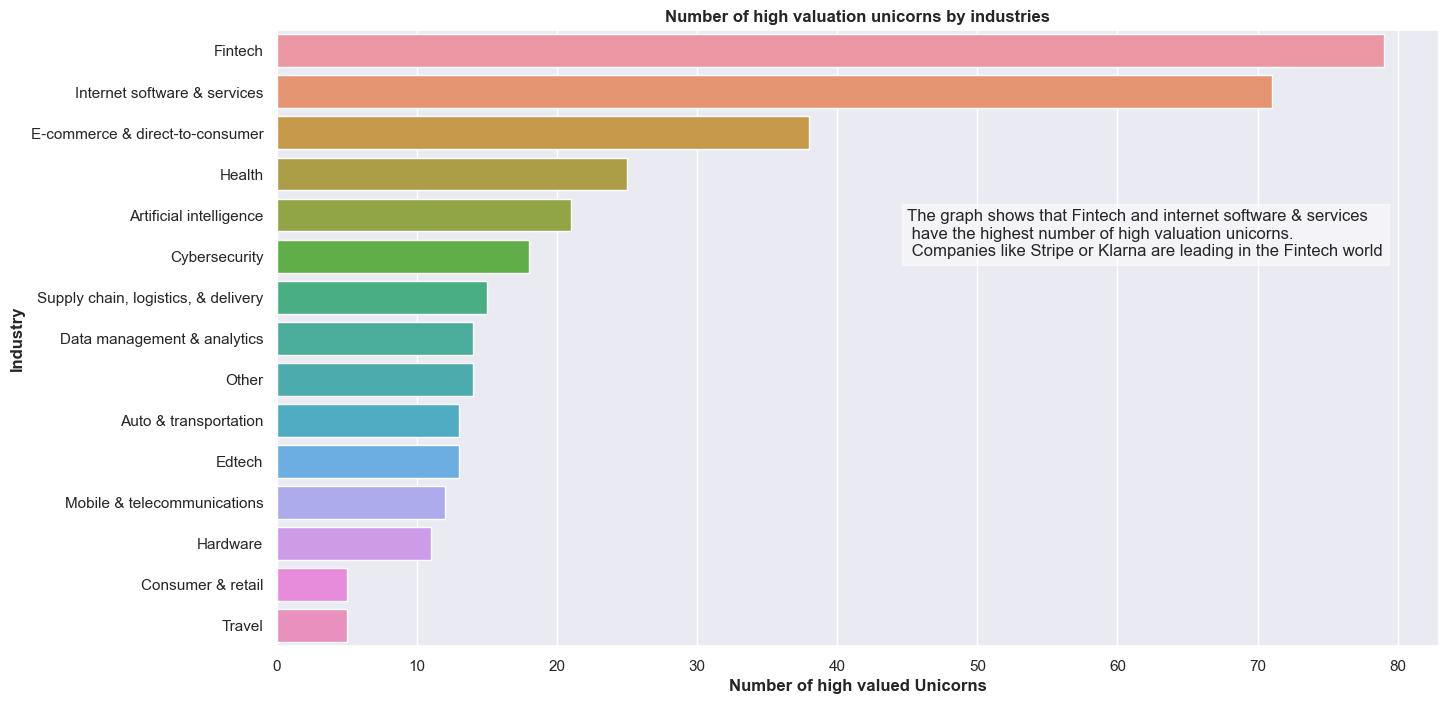

In [35]:
#Create a bar graph for comparison
sns.barplot(data= bar_high, x= 'Number of unicorns', y='Industry')
plt.xlabel('Number of high valued Unicorns', weight= 'bold')
plt.ylabel('Industry', weight= 'bold')
plt.title('Number of high valuation unicorns by industries', weight= 'bold')

plt.text(45, 5, 'The graph shows that Fintech and internet software & services \n have the highest number of high valuation unicorns. \n Companies like Stripe or Klarna are leading in the Fintech world', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

**6. Top 10 investors**

In [36]:
# Firstly, I separate the investors by the commas for aggregation 
from pandas import Series, DataFrame

In [37]:
split = companies['Select Investors'].str.split(',').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'Investor'
companies = companies.join (split)
companies.head(2)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Valuation_num,Funding_num,Years To Unicorn,Year Joined,Evaluation_category,Investor
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",180,8,5,2017,High,Sequoia Capital China
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",180,8,5,2017,High,SIG Asia Investments


In [38]:
#Group data and identify top investors list
'''
I group data on investor and aggregate number of companies invested. After that, I filter top 10 Investors 
'''
companies.groupby('Investor')['Company'].count().reset_index(name= 'Number of companies invested').sort_values(by = 'Number of companies invested', ascending = False)

,Investor,Number of companies invested
861,Tiger Global Management,39
24,Accel,32
751,Sequoia Capital,30
1397,Sequoia Capital China,30
1009,Andreessen Horowitz,29
...,...,...
240,Doha Venture Capital,1
773,SingTel Innov8,1
774,SingulariTeam,1
775,Sino-Ocean Capital,1


**Summary report**

1. Industries like Auto & Transportation and Artificial Intelligence & Hardware typically achieve unicorn status faster, taking about 4 to 4.5 years. In contrast, sectors like Health and Consumer Retail take longer, around 7 to 8 years. I believe for industry like healthcare, companies must navigate extensive regulatory requirements and approval processes, which can be time-consuming and costly. Also, gaining market trust and adoption in the health industry can be slower due to the critical nature of health services and products.

2. Across investment funds for various industries, Fintech received the most at nearly $107 billion, followed by E-commerce & Direct-to-Consumer with $74 billion and Internet Software & Services with $73 billion.

3. In 2021, unicorn company emergence hit a record high, with Fintech (138 unicorns) and Internet Software & Services (119 unicorns) leading the way. During the peak of COVID-19, the Healthcare industry also saw rapid growth, adding 40 unicorns. In the same period, I also noticed a noticable increase of unicorns in the AI field with companies like open AI.  However, the number of unicorns declined in 2022 for all industries.

4. The top countries by total unicorn valuation are the United States ($1,922 billion), China ($696 billion), India ($196 billion), and the UK ($195 billion).

5. High-valued unicorns are predominantly found in the Fintech, Internet Software & Services, and E-commerce & Direct-to-Consumer sectors.

6. Top investors include Tiger Global Management, Accel, Sequoia Capital China, and Andreessen Horowitz.

**Reference**

CB Insights. (n.d.). The unicorn report: 2024 edition. CB Insights.[Dataset] https://www.cbinsights.com/research-unicorn-companies

Google. (n.d.). Google data analytics professional certificate. Coursera. https://www.coursera.org/professional-certificates/google-data-analytics

Google. (n.d.). Google advanced data analytics capstone. Coursera. https://www.coursera.org/learn/google-advanced-data-analytics-capstone

Analyst Builder. (n.d.). Pandas for data analysis. Analyst Builder. https://www.analystbuilder.com/courses/pandas-for-data-analysis



